In [1]:
from netCDF4 import Dataset as netDataset
import os
import xarray as xr
from datetime import timedelta, date, datetime
from tqdm import tqdm
import time
import numpy as np
import data_processing_tool as dpt


file_ACCESS_dir="F:/climate/access-s1/pr/daily/"
file_BARRA_dir="C:/Users/JIA059/barra/"
# file_BARRA_dir="/g/data/ma05"
ensemble=['e01','e02']
# ensemble=['e01','e02','e03','e04','e05','e06','e07','e08','e09','e10','e11']

lat_name = "lat"
lon_name = "lon"
var_name="pr"
leading_time=217
leading_time_we_use=31

domain=[111.85, 155.875, -44.35, -9.975] #awap




F:/climate/access-s1/pr/daily/e02/da_pr_19900125_e02.nc
access_datashape: (324, 432)
access_aus_datashape: (62, 53)
<xarray.DataArray (lat: 62, lon: 53)>
array([[0.05542551, 0.04737074, 0.07170541, ..., 2.18113224, 0.70585775,
        0.21659931],
       [0.05693854, 0.05084265, 0.06014379, ..., 0.7642552 , 0.29077673,
        0.1024095 ],
       [0.06898382, 0.0620898 , 0.04882202, ..., 0.4838007 , 0.17055034,
        0.14963721],
       ...,
       [2.47403371, 0.38493197, 5.57162161, ..., 1.09412518, 0.96126382,
        0.52299202],
       [3.69945847, 1.33857935, 5.58223687, ..., 1.21048444, 1.52767258,
        2.03608818],
       [3.87369969, 4.06514875, 1.90336393, ..., 3.50123359, 5.591427  ,
        6.8989316 ]])
Coordinates:
  * lat      (lat) float32 -44.166664 -43.611107 ... -10.833328 -10.277771
  * lon      (lon) float32 112.08333 112.916664 ... 154.58333 155.41667


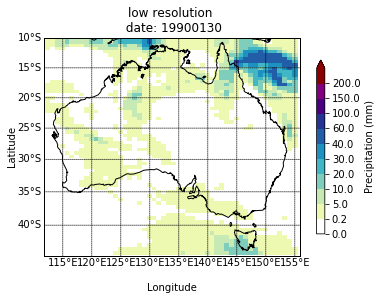

(62, 53)
(248,212)
(496,424)


In [2]:
#demo some low resolution(Ra)
demo_date=date(1990,1,25)
idx=5
ensambel="e02"

demo_filename_low=file_ACCESS_dir+ensambel+"/da_pr_"+demo_date.strftime("%Y%m%d")+"_"+ensambel+".nc"

print(demo_filename_low)
data_low=dpt.load_3D_netCDF(demo_filename_low,"pr",lat_name,lon_name,idx=idx)
print("access_datashape: "+str(data_low.shape))
data_low_aus=dpt.map_aust(data_low,domain =domain )
print("access_aus_datashape: "+str(data_low_aus.shape))#(62,54)
print(data_low_aus*86400)


title="low resolution \n date: "+(demo_date+timedelta(idx)).strftime("%Y%m%d")
dpt.draw_BARRA_aus(data_low_aus*86400,title=title)     
print(data_low_aus.shape)
print("("+str(data_low_aus.shape[0]*4)+","+str(data_low_aus.shape[1]*4)+")")
print("("+str(data_low_aus.shape[0]*8)+","+str(data_low_aus.shape[1]*8)+")")

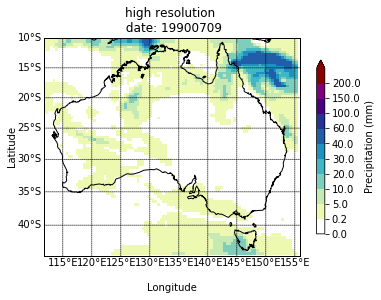

(78, 100)


In [11]:
# datasdad=netDataset(demo_filename_low)
# print(datasdad["pr"])
a=dpt.interp_da_2d_shape(data_low_aus,(78,100))
title="high resolution \n date: "+demo_date.strftime("%Y%m%d")
dpt.draw_BARRA_aus(a*86400,title=title)  
print(a.shape)

In [4]:
target_shape=(78,101)

In [5]:
#demo high resolution(BARRA)
domain = [111.85, 155.875, -44.35, -9.975]#awap
domain = [data_low_aus.lon.data.min(), data_low_aus.lon.data.max(), data_low_aus.lat.data.min(), data_low_aus.lat.data.max()]


print(domain)


def read_barra_data_an(root_dir,date_time,nine2nine=False):
    shape=(768,1200)
    enum={0:"1200",1:"1800",2:"0000",3:"0600"}
    daily=np.zeros(shape)
    if nine2nine:
        for i in range(4):
            if i<=2:
                filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+date_time.strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"
            else:
                filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+(date_time+timedelta(1)).strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"
                
            if not os.path.exists(filename):
                print("Error: "+filename+" not found")
#                 raise Exception("Error: "+filename+" not found")
                return

                
            var,lats,lons=dpt.load_2D_netCDF(filename,'accum_prcp',xarray=False)
            daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])
    
    
    else:
        for i in range(4):
            filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+date_time.strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"
            var,lats,lons=dpt.load_2D_netCDF(filename,'accum_prcp',xarray=False)
            daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])

    
data_high=read_barra_data_an(file_BARRA_dir,demo_date,nine2nine=True)
data_high_aus=dpt.map_aust(data_high)
title="high resolution \n date: "+demo_date.strftime("%Y%m%d")
dpt.draw_BARRA_aus(data_high_aus,title=title)   


print(data_high_aus.shape)
    
# demo_filename_high=file_BARRA_dir+demo_date.strftime("%Y/%m")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+""+"T0000Z.nc"
# print(demo_filename_high)
# dpt.load_2D_netCDF()

print("("+str(data_high_aus.shape[0]/4)+","+str(data_high_aus.shape[1]/4)+")")
print("("+str(data_high_aus.shape[0]/8)+","+str(data_high_aus.shape[1]/8)+")")

[112.08333, 155.41667, -44.166664, -10.277771]
Error: C:/Users/JIA059/barra/1990/01/accum_prcp-an-spec-PT0H-BARRA_R-v1.1-19900125T1200Z.nc not found


TypeError: '>=' not supported between instances of 'NoneType' and 'float'

C:/Users/JIA059/barra/1990/07/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900709T0600Z.sub.nc
C:/Users/JIA059/barra/1990/07/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900709T1200Z.sub.nc
C:/Users/JIA059/barra/1990/07/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900709T1800Z.sub.nc
C:/Users/JIA059/barra/1990/07/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900709T0000Z.sub.nc


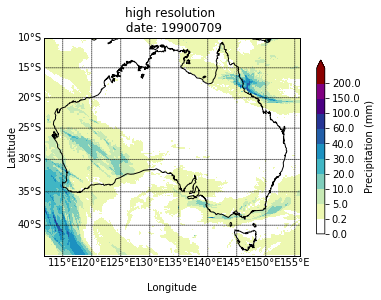

(312, 400)


In [6]:
#read Barra forecast data :


def read_barra_data_an(self,root_dir,date_time,nine2nine=False):
    shape=(768,1200)
    daily=np.zeros(shape)
    if nine2nine:
        for i in range(4):
            if i<=2:
                filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+(date_time).strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"
            else:
                filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+(date_time+timedelta(1)).strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"

            if not os.path.exists(filename):
                print("Error: "+filename+" not found")
#                 raise Exception("Error: "+filename+" not found")
                return


            var,lats,lons=dpt.load_2D_netCDF(filename,'accum_prcp',xarray=False)
            daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])


    else:
        for i in range(4):
            filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-an-spec-PT0H-BARRA_R-v1.1-"+date_time.strftime("%Y%m%d")+"T"+enum[i]+"Z.nc"
            var,lats,lons=dpt.load_2D_netCDF(filename,'accum_prcp',xarray=False)
            daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])




def read_barra_data_fc(root_dir,date_time,nine2nine=True,date_minus_one=1):#argse
    """
    accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900130T0600Z.sub.nc          subscript times 4-6
    accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900130T1200Z.sub.nc          1-6
    accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900130T1800Z.sub.nc           1-6
    accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900131T0000Z.sub.nc          1-6
    accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900131T0600Z.sub.nc           1-3
    """
    shape=(768,1200)
    
    daily=np.zeros(shape)
    
    if nine2nine:
        enum={0:"0600",1:"1200",2:"1800",3:"0000",4:"0600"}
        for i in range(5):
            if i==0:
                date_we_use=date_time-timedelta(date_minus_one)
                filename=root_dir+date_we_use.strftime("%Y/%m/")+"accum_prcp-fc-spec-PT1H-BARRA_R-v1-"+date_we_use.strftime("%Y%m%d")+"T"+enum[i]+"Z.sub.nc"
                dataset=netDataset(filename)
                daily+=np.sum(dataset["accum_prcp"][3:6],axis=0)
#                 print(var.shape)
            elif i==4:
                date_we_use=date_time-timedelta(date_minus_one-1)
                filename=root_dir+date_we_use.strftime("%Y/%m/")+"accum_prcp-fc-spec-PT1H-BARRA_R-v1-"+date_we_use.strftime("%Y%m%d")+"T"+enum[i]+"Z.sub.nc"
                dataset=netDataset(filename)
                daily+=np.sum(dataset["accum_prcp"][0:3],axis=0)
                lats=dataset["latitude"][:]
                lons=dataset["longitude"][:]
#                 print(dataset["accum_prcp"][0:3].shape)
            elif i==3:
                date_we_use=date_time-timedelta(date_minus_one-1)
                filename=root_dir+date_we_use.strftime("%Y/%m/")+"accum_prcp-fc-spec-PT1H-BARRA_R-v1-"+date_we_use.strftime("%Y%m%d")+"T"+enum[i]+"Z.sub.nc"
                dataset=netDataset(filename)
                daily+=np.sum(dataset["accum_prcp"][:],axis=0)       
            else:
                date_we_use=date_time-timedelta(date_minus_one)
                filename=root_dir+date_we_use.strftime("%Y/%m/")+"accum_prcp-fc-spec-PT1H-BARRA_R-v1-"+date_we_use.strftime("%Y%m%d")+"T"+enum[i]+"Z.sub.nc"
                dataset=netDataset(filename)
                daily+=np.sum(dataset["accum_prcp"][:],axis=0)
            print(filename)
#             if not os.path.exists(filename):
#                 print("Error: "+filename+" not found")
# #                 raise Exception("Error: "+filename+" not found")
#                 return

                
#             var,lats,lons=dpt.load_3D_netCDF(filename,'accum_prcp',xarray=False)
#             daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])
    
    
    else:
        enum={0:"0600",1:"1200",2:"1800",3:"0000"}
        for i in range(4):
            filename=root_dir+date_time.strftime("%Y/%m/")+"accum_prcp-fc-spec-PT1H-BARRA_R-v1-"+date_time.strftime("%Y%m%d")+"T"+enum[i]+"Z.sub.nc"
            print(filename)
            dataset=netDataset(filename)
            daily+=np.sum(dataset["accum_prcp"][:],axis=0)
#             daily+=dataset["accum_prcp"][5]
            lats=dataset["latitude"][:]
            lons=dataset["longitude"][:]
#             var,lats,lons=dpt.load_3D_netCDF(filename,'accum_prcp',lat_name="latitude",lon_name="longitude",xarray=False,idx=0)
#             daily+=var
        return xr.DataArray(daily,coords=[lats,lons],dims=["lat","lon"])
    
demo_date=date(1990,7,9)
date_minus_one=1
nine2nine=False
data_high=read_barra_data_fc(file_BARRA_dir,demo_date,nine2nine=nine2nine,date_minus_one= date_minus_one)
data_high_aus=dpt.map_aust(data_high,domain=[111.85, 155.875, -44.35, -9.975])
title="high resolution \n date: "+demo_date.strftime("%Y%m%d")
dpt.draw_BARRA_aus(data_high_aus,title=title)   
print(data_high_aus.shape)


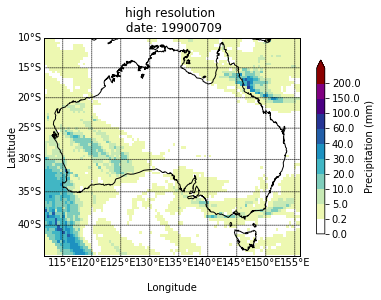

In [ ]:
# name_f='/home/jxx/climate/data/BARRA/forecast/1990/01/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900101T1200Z.sub.nc'
name_f="C:/Users/JIA059/barra/1990/01/accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900101T1200Z.sub.nc"

lat_name = "latitude"
lon_name = "longtitude"
# data_forecast, lat, lon = dpt.load_3D_netCDF(name_f,'accum_prcp',lat_name,lon_name)


name_a="/home/jxx/climate/data/BARRA/data/2010/01/accum_prcp-an-spec-PT0H-BARRA_R-v1.1-20100101T0000Z.nc"

# data_a = Dataset(name_a, 'r')
data_f = netDataset(name_f, 'r')

print(data_f)
# print(data_forecast.shape)

# print(us.load_2D_netCDF(name,'accum_prcp',lat_name,lon_name)[0].shape)




In [ ]:
print(data_f["forecast_period"][:])#hours since 1970-01-01 00:00:00
accum_prcp-fc-spec-PT1H-BARRA_R-v1-19900101T1200Z.sub.nc
#19900101 1200
12-13
13-14
14-15
15-16
16-17
17-18

In [ ]:
def interp_tensor_2d(X, size, fill=True):
    if fill:
        X[np.isnan(X)]=0
    scaled_tensor = cv2.resize(X, (size[1], size[0]),interpolation=cv2.INTER_CUBIC)
    return scaled_tensor


def interp_dim_shape(x, shape,linspace=True):
    '''get the corresponding lat and lon'''
    x0, xlast = x[0], x[-1]
    size=shape
    if linspace:
        y = np.linspace(x0,xlast,size)
    else:
        step = (x[1]-x[0])/scale
        y = np.arange(x0, xlast, step)
    return y

def interp_da_2d_shape(da, shape):
    '''
    da is xarray
    Assume da is of dimensions ('lat', 'lon')
    single data input
    and return a xr array
    '''
    tensor = da.values
    # interpolate lat and lons
    latnew = interp_dim_shape(da[da.dims[0]].values, shape[0])
    lonnew = interp_dim_shape(da[da.dims[1]].values, shape[1])


    # lets store our interpolated data
    scaled_tensor = interp_tensor_2d(tensor, (latnew.shape[0],lonnew.shape[0]), fill=True)
    if latnew.shape[0] != scaled_tensor.shape[0]:
        raise ValueError("New shape is shitty")
    # intialize a new dataarray
    return xr.DataArray(scaled_tensor, coords=[latnew, lonnew],
                 dims=da.dims)

In [ ]:
import numpy as np


def read_grd(filename):
    with open(filename) as infile:
        ncols = int(infile.readline().split()[1])
        nrows = int(infile.readline().split()[1])
        xllcorner = float(infile.readline().split()[1])
        yllcorner = float(infile.readline().split()[1])
        cellsize = float(infile.readline().split()[1])
        nodata_value = infile.readline().split()[1]
    longitude = xllcorner + cellsize * np.arange(ncols)
    latitude = xllcorner + cellsize * np.arange(nrows)
    value = np.loadtxt(filename, skiprows=6,usecols=)

    return longitude.shape, latitude.shape

read_grd("C:/Users/JIA059/Downloads/1900121719001217.grid")

In [ ]:
TheFile=open("C:/Users/JIA059/Downloads/1900121719001217.grid","r") # open the file for reading (thus the "r")
TheContent=TheFile.read() # read the entire file contents into a variable
print(TheContent)# print the entire file contents
TheFile.close() # close the file

In [ ]:
TheFile=open("C:/Users/JIA059/Downloads/2019120820191208.grid","r") # open the file for reading (thus the "r")
# TheContent=TheFile.read() # read the entire file contents into a variable
# print(TheContent) # print the entire file contents
# TheFile.close() # close the file
a=np.ones((691,886))
# file = open("sample.txt") 
for i,line in enumerate(TheFile):
    if i<6:
#         print(i)
        pass
    else:
#         print(len(line.split()))
        a[i-6]=line.split()
        print(line)
    if i>=696:
        break
#     ncols = int(line.split())
#     nrows = int(line.split()[1])
#     xllcorner = float(line.split()[1])
#     yllcorner = float(line.split()[1])
#     cellsize = float(line.split()[1])
#     print( line.split() )
    

TheFile.close()

print(a)